<div class="alert alert-block alert-warning">
<b>Disclaimer:</b> The main objective of this jupyter notebook is to show how to fit simple data by
    
- defining a fitting model
- creating the reference data to which the model will be fitted to. In standard cases, this step should be replaced by loading your experimental data
- setting and running the fit   
- extracting and displaying information about the results

The syntax to fit data is minimizer-dependent. Here we focus on a fitting routing provided by the `scipy` python package: <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html">scipy.optimize.curve_fit</a>.   
    
Please also note that the initial guessed parameters might not be optimal, resulting in a poor fit of the reference data.
</div>


<a id='Table of Contents'></a><h1>Table of Contents</h1>

- <a href='#def_function'>Definition of the fitting model</a>
- <a href='#imports'>Importing libraries</a>
- <a href='#anim_plot'>Plot of the fitting model</a>
- <a href='#ref_data'>Creating reference data</a>
- <a href='#fitting'>Setting and fitting</a>
- <a href='#plot'>Displaying the results</a>  
- <a href='#exercise'>Exercises</a>

(<a href='#Table of Contents'>Top</a>)<a id='imports'></a><h2>Importing libraries</h2>

Please refer to the notebooks about `numpy` and `matplotlib` for more details. 

In [1]:
# import python modules for plotting, fitting
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# for interactive plot
import ipywidgets

(<a href='#Table of Contents'>Top</a>)<a id='def_function'></a><h2>Definition of the fitting model</h2>

Here we define a simple lorentzian function.  

Please note that there are other options, such as importing [`lmfit.LorentzianModel`](https://lmfit.github.io/lmfit-py/builtin_models.html#lmfit.models.LorentzianModel),  [`QENSmodels.lorentzian`](https://github.com/QENSlibrary/QENSmodels/blob/master/QENSmodels/lorentzian.py) or [`pyspec.fitfuncs.lor`](https://pythonhosted.org/pyspec/fit.html).

In [2]:
def lorentzian(xx, scale=1.0, center=1.0, hwhm=3.0):
    if hwhm == 0:
        raise ValueError('hwhm of the lorentzian is equal to zero.')
    return scale * hwhm / ((xx-center)**2 + hwhm**2) / np.pi

(<a href='#Table of Contents'>Top</a>)<a id='anim_plot'></a><h2>Plot of the fitting model</h2>

The widget below shows how the variations of the lorentzian's parameters, *Scale*, *Center* and *FWHM*,  influence its shape.

In [3]:
# define values of the variable of the functions to be used in this tutorial
xx = np.linspace(-10, 10, 500)

# define function to be plotted
def interactive_plot(scale, center, hwhm):
    plt.plot(xx, lorentzian(xx, 
                            float(scale), 
                            float(center), 
                            float(hwhm)))
    plt.ylabel('lorentzian(x,{scale},{center},{hwhm})'.
               format(scale=scale, center=center, hwhm=hwhm))
    plt.xlabel('x')
    plt.grid()
    plt.show()

# define modifiable parameters and their range of variations
interactive_plot = ipywidgets.interactive(interactive_plot, 
                                          scale=(1, 10), 
                                          center=(0, 10), 
                                          hwhm=(1, 5))
# Define function to reset all parameters' values to the initial ones
def reset_values(b):
    """Reset the interactive plots to inital values."""
    interactive_plot.children[0].value = 5
    interactive_plot.children[1].value = 5
    interactive_plot.children[2].value = 3

# Define reset button and occurring action when clicking on it
reset_button = ipywidgets.Button(description = "Reset")
reset_button.on_click(reset_values)

# define layout with plots, sliders for parameters' values 
# and reset button
output = interactive_plot.children[-1]
output.layout.height = '270px'
display(interactive_plot, reset_button)

interactive(children=(IntSlider(value=5, description='scale', max=10, min=1), IntSlider(value=5, description='…

Button(description='Reset', style=ButtonStyle())

(<a href='#Table of Contents'>Top</a>)<a id='ref_data'></a><h2>Creating reference data</h2>

**Input:** the reference data for this simple example correspond to a Lorentzian with added noise.

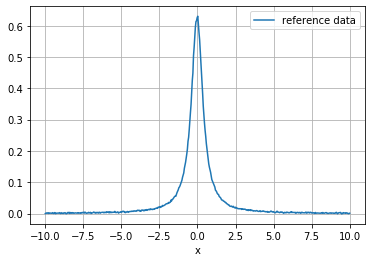

In [4]:
# Creation of reference data
# lorentzian with noise added as background and modulation in its amplitude
added_noise = 0.1*np.random.normal(0, 1, 500)
lorentzian_noisy = lorentzian(xx, 0.89, -0.025, 0.45)*(1. + 0.1*added_noise) + 0.01*added_noise

# Display reference data
plt.plot(xx, lorentzian_noisy, label='reference data')
plt.xlabel('x')
plt.grid()
plt.legend()
plt.show()

(<a href='#Table of Contents'>Top</a>)<a id='fitting'></a><h2>Setting and fitting</h2>

The fit is performed using `scipy.optimize.curve_fit`. <br> The example is based on implementations from https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

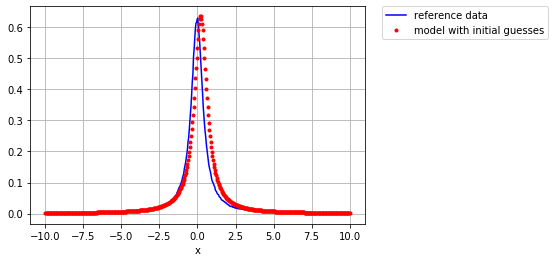

In [5]:
# define set of initial values for the parameters to be refined 
initial_parameters_values = [1, 0.2, 0.5]

# plot initial model and reference data
plt.plot(xx, lorentzian_noisy, 'b-', label='reference data')
plt.plot(xx, lorentzian(xx, *initial_parameters_values), 'r.', label='model with initial guesses')
plt.xlabel('x')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

`scipy.optimize_curve_fit` offers the possibility of choosing the method for optimization. Here we are going exploit this option by providing a widget to select your method.

In [6]:
chosen_method_optim = ipywidgets.RadioButtons(
    options=['lm', 'trf', 'dogbox'],
    value='lm', # Defaults to 'lm'
    description='Method for optimization',
    style={'description_width': 'initial'},
    disabled=False
)

chosen_method_optim

RadioButtons(description='Method for optimization', options=('lm', 'trf', 'dogbox'), style=DescriptionStyle(de…

In [9]:
# perform fit
print()
params, params_covariance = curve_fit(lorentzian, xx, lorentzian_noisy, method=chosen_method_optim.value, p0=initial_parameters_values)

(<a href='#Table of Contents'>Top</a>)<a id='plot'></a><h2>Displaying the results</h2>

In [10]:
# Calculation of the errors on the refined parameters:
params_error = np.sqrt(np.diag(params_covariance))

print('Values of refined parameters:')
print('scale:', params[0],'+/-', params_error[0])
print('center :', params[1],'+/-', params_error[1])
print('HWHM', params[2],'+/-', params_error[2])

Values of refined parameters:
scale: 0.8907506388535489 +/- 0.0008231207433414048
center : -0.024078711326271058 +/- 0.0004164792800140074
HWHM 0.45076764383978524 +/- 0.0005890924242074814


In [ ]:
# Comparison of reference data with fitting result
plt.plot(xx, lorentzian_noisy, 'b-', label='reference data')
plt.plot(xx, lorentzian(xx, *params), 'g--', label='fit: %5.3f, %5.3f, %5.3f' % tuple(params))
plt.legend()
plt.xlabel('x')
plt.grid()
plt.show()

(<a href='#Table of Contents'>Top</a>)<a id='exercise'></a><h2>Exercise</h2>
This exercise uses the same procedure as above but with slightly different data.  
The objective is to determine the new fitting results.  

**(1)** Determine the initial guesses for the amplitude, center and width, *Scale*, *Center* and *FWHM* to fit the following data based on a Lorentzian profile with added noise running the cell below and using the generated widget.

In [ ]:
xx = np.linspace(-10,10,500)

lorentzian_noisy_exo = lorentzian(xx, 3, 4, 0.5)*(1. + 0.1*np.random.normal(0,1,500)) + 0.01*np.random.normal(0,1,500)

def interactive_plot_exo(scale, center, hwhm):
    plt.plot(xx, lorentzian(xx, float(scale), float(center), float(hwhm)), label='model to be fitted')
    plt.ylabel('lorentzian(x,{scale},{center},{hwhm})'.
               format(scale=scale, center=center, hwhm=hwhm))
    
    plt.plot(xx, lorentzian_noisy_exo, '', label="experimental data")
    plt.xlabel('x')
    plt.legend()
    plt.grid()
    plt.show()

interactive_plot_exo = ipywidgets.interactive(interactive_plot_exo, 
                                          scale=(1, 10), 
                                          center=(-5, 5), 
                                          hwhm=(0.1, 1))


def reset_values_exo(b):
    """Reset the interactive plots to inital values."""
    interactive_plot_exo.children[0].value = 5
    interactive_plot_exo.children[1].value = -3
    interactive_plot_exo.children[2].value = 0.1

reset_button_exo = ipywidgets.Button(description = "Reset")
reset_button_exo.on_click(reset_values_exo)

output_exo = interactive_plot_exo.children[-1]
output_exo.layout.height = '270px'
display(interactive_plot_exo, reset_button_exo)

**(2)** Running the following cells will:
- assign the values you determined just above to your model
- plot the initial model and the experimental data
- run the fit

In [ ]:
initial_parameters_values_exo = [interactive_plot_exo.children[i].value for i in range(3)]
initial_parameters_values_exo

The syntax above uses list comprehensions (as described in another tutorial). Options for such inputs are:
- list comprehension
```python
x = [i for i in range(10)]```
- with a standard `for` loop:
```python
x = []
for i in range(10):
    x[i] = i
```
- entered by hand
```python 
x = [0, 1, 2, 3, , 4, 5, 6, 7, 8, 9]```

In [ ]:
plt.plot(xx, lorentzian_noisy_exo, 'b-', label='reference data for exercise')
plt.plot(xx, lorentzian(xx, *initial_parameters_values_exo), 'r.', label='model with initial guesses')
plt.xlabel('x')
plt.title("Exercise: plot before fit")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
params_exo, pcov_exo = curve_fit(lorentzian, xx, lorentzian_noisy_exo, 
                               p0=initial_parameters_values_exo)

**(3)** Display the final values of the refined parameters

In [ ]:
print('Values of refined parameters:')
print('scale:', params_exo[0])
print('center :', params_exo[1])
print('HWHM', params_exo[2])
print('to be compared to 3, 4, 0.5')

**(4)** Plot the reference data and the model  

Replace the numbers in brackets below with the relevant name:   
(1) name of reference data  
(2) name of list of values of fitted parameters 

Refer to the <a href='#plot'>first example</a> for help

In [ ]:
plt.plot(xx, (1), 'b.-', label='reference data')
plt.plot(xx, lorentzian(xx, *(2)), 'g+', label='fit: %5.3f, %5.3f, %5.3f' % tuple(params_exo))
plt.legend()

plt.xlabel('x')
plt.grid()
plt.show()

# Additional references
Other fitting packages could be used. For example,
- [bumps](https://bumps.readthedocs.io/en/latest/)
- [lmfit](https://lmfit.github.io/lmfit-py/)

For further details about `ipywidgets`, please refer to the following [link](https://ipywidgets.readthedocs.io/en/latest/index.html).